<a href="https://colab.research.google.com/github/CadenBaughman/Statistics-AI-Caden-Baughman/blob/main/Copy_of_Final_Project_Notebook_Hahn_Stats_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt  # Visualization library for plotting graphs and images
import imageio  # Library for reading and writing a wide range of image data
import torch  # Core PyTorch library for tensor operations and deep learning
import torchvision  # Library for image and video processing, models, and pre-trained weights
from torchvision import models, transforms  # Specific imports for models and image transformations
import numpy as np  # Fundamental package for scientific computing with Python
from torchvision.models import *  # Importing all models available in torchvision for ease of use
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving many image formats
import requests  # Library for making HTTP requests to fetch data from the Internet
from torchvision import models  # Redundant import, already covered above
from torchsummary import summary  # Utility to print a summary of the network showing the number of parameters


In [ ]:
def plot(x):
    fig, ax = plt.subplots()  # Create a figure and a set of subplots
    im = ax.imshow(x, cmap='gray')  # Display data as an image, i.e., on a 2D regular raster, with grayscale coloring
    ax.axis('off')  # Turn off the axis to not display any labels or ticks
    fig.set_size_inches(20, 20)  # Set the figure size in inches (width, height)
    plt.show()  # Display the figure


In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') # Read an image from a URL into an array

<ipython-input-3-588e2a28bfed>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') # Read an image from a URL into an array


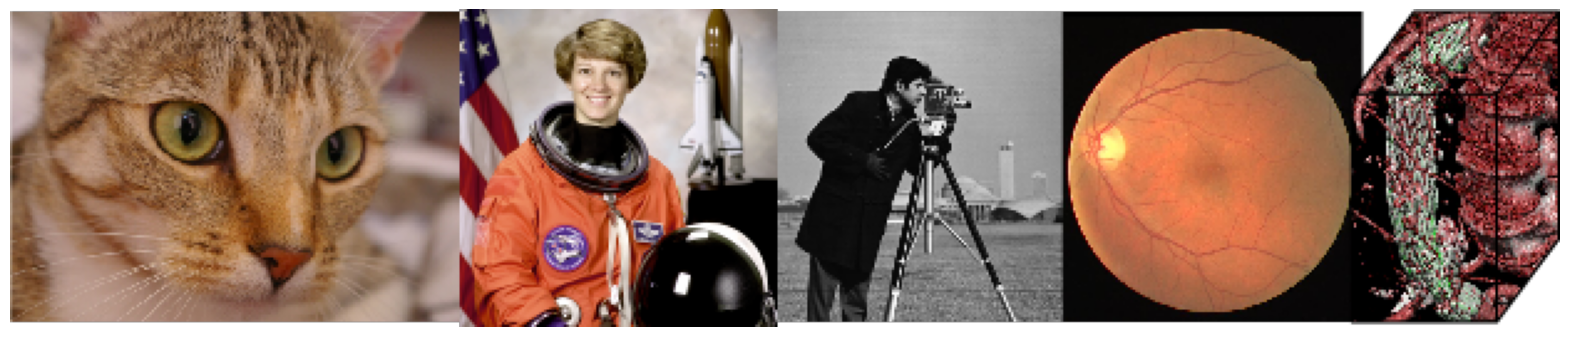

In [ ]:
plot(im)

In [ ]:
net = alexnet(pretrained=True).cuda(0)  # Load a pretrained AlexNet model and move it to GPU device 0 for faster computation


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 40.1MB/s]


In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],  # Mean values for normalization, used for pre-trained models
   std=[0.229, 0.224, 0.225]    # Standard deviation values for normalization
)

preprocess = transforms.Compose([
   transforms.Resize(256),      # Resize the input image to 256x256 pixels
   transforms.CenterCrop(224),  # Crop the image to 224x224 pixels from the center
   transforms.ToTensor(),       # Convert the image to a PyTorch tensor
   normalize                    # Apply the normalization defined above
])


In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-7-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


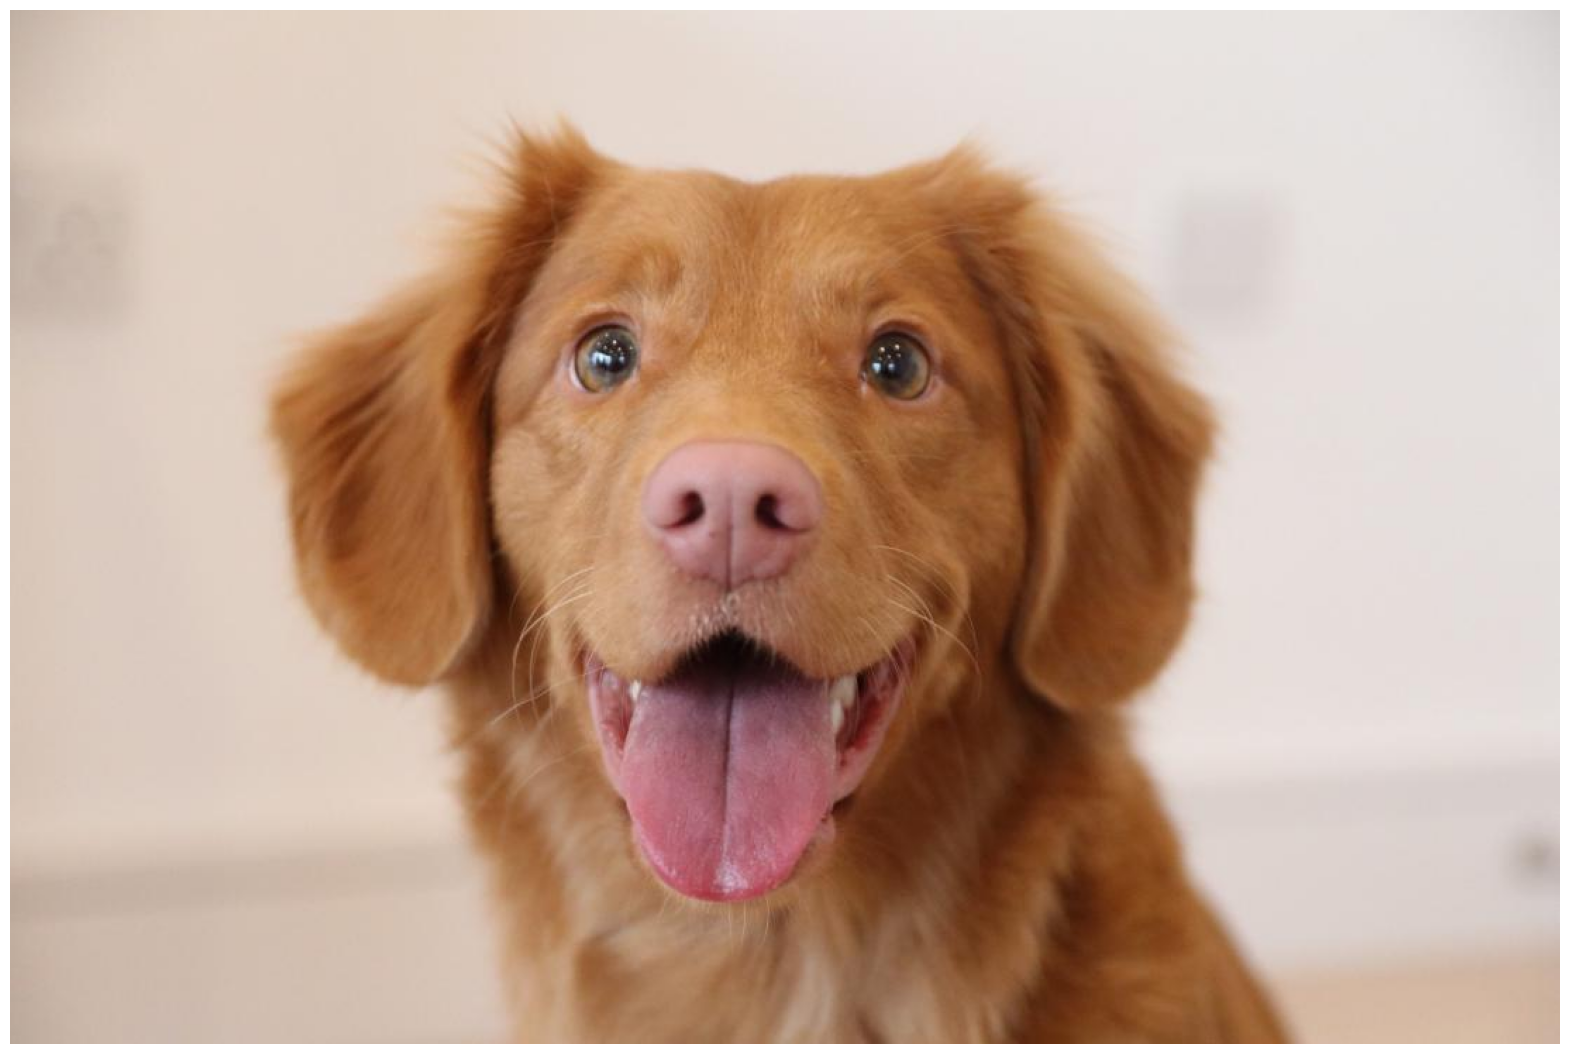

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)  # Apply predefined preprocessing transformations to the input image

In [ ]:
img_tensor = img_tensor.unsqueeze_(0)  # Add a batch dimension to the tensor for model compatibility

In [ ]:
img_tensor.shape  # Get the shape of the tensor (useful for debugging to ensure correct dimensions)

torch.Size([1, 3, 224, 224])

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)  # Convert the tensor to a CUDA tensor on GPU device 0

<ipython-input-13-5781fac03a91>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)  # Convert the tensor to a CUDA tensor on GPU device 0


In [ ]:
out = net(img_variable)  # Pass the processed image tensor through the network to obtain predictions

In [ ]:
label_index = out.cpu().data.numpy().argmax() # Extract the index of the highest prediction from the network output, moving data to CPU

In [ ]:
label_index # Display the label index (useful for debugging)

215

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])  # Get the indices of the top 10 predictions

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'  # URL containing the label mappings for the model outputs

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}  # Fetch and parse the label mappings from the URL

In [ ]:
print(labels[label_index])  # Print the most likely label of the image

Brittany spaniel


In [ ]:
for i in range(10):  # Loop through the top 10 predicted labels
    print(labels[top_list[i]])  # Print each label

Brittany spaniel
Sussex spaniel
golden retriever
Irish setter, red setter
clumber, clumber spaniel
tennis ball
Tibetan mastiff
vizsla, Hungarian pointer
Border collie
cocker spaniel, English cocker spaniel, cocker


In [ ]:
net  # This line is typically used in interactive environments like Jupyter Notebooks to display the current configuration of 'net'

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(net, (3, 224, 224))  # Display a summary of the network architecture, specifying the input size as (channels, height, width)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()  # Run the first layer of the network 'features' on the input, then move the output to CPU and convert to a NumPy array


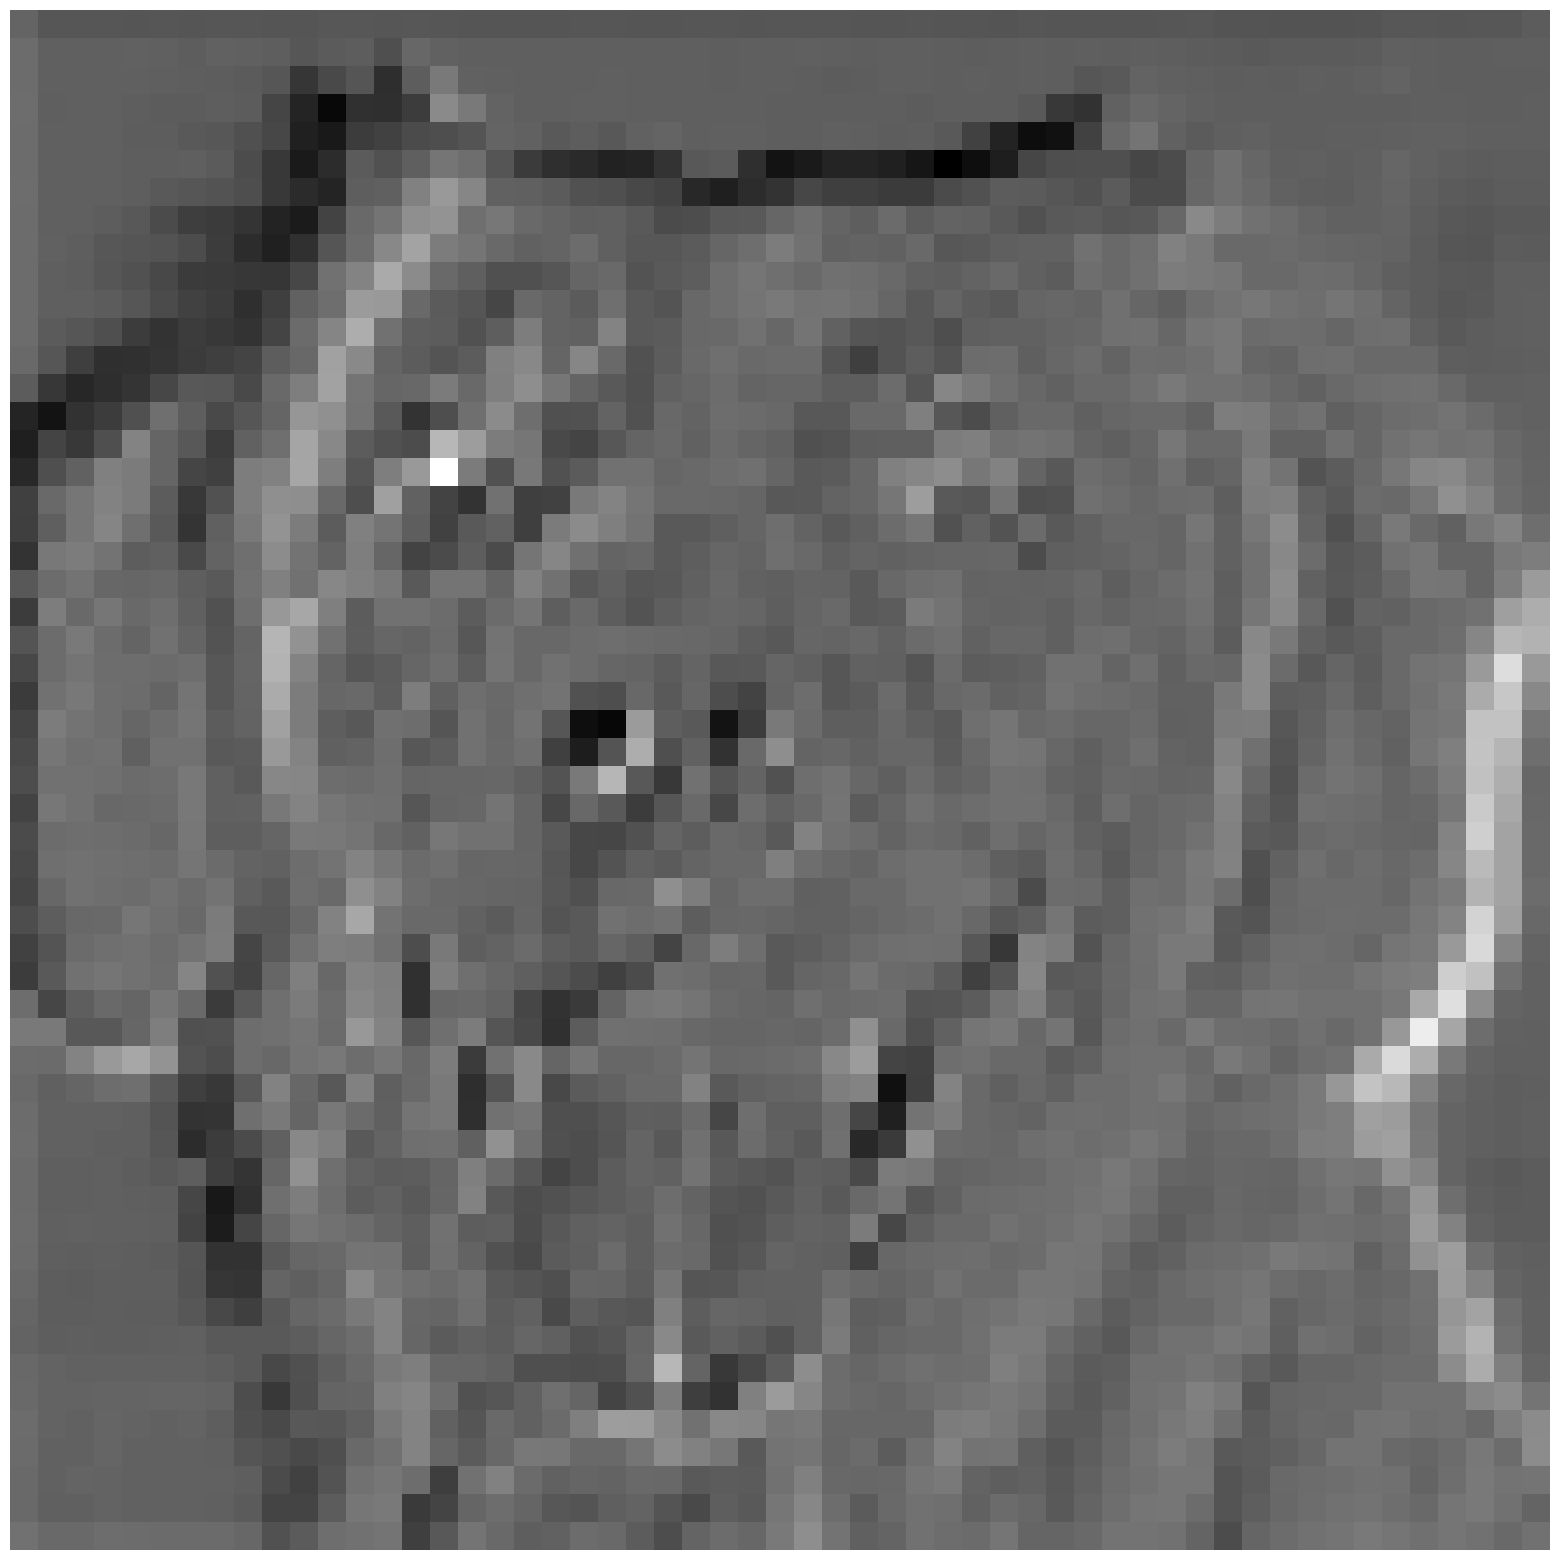

In [ ]:
plot(out[0,0,:,:])  # Plot the output of the first channel of the first batch's feature map using the 'plot' function

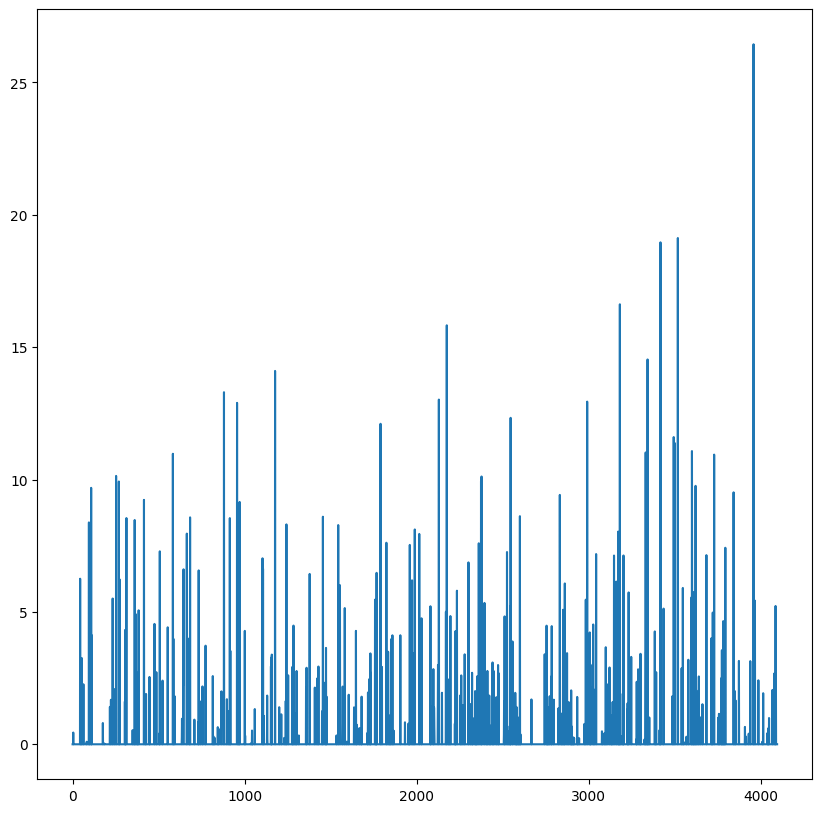

In [ ]:
plt.plot(np.arange(4096), net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())  # Plot values derived from processing the image through part of a network
fig = plt.gcf()  # Get the current figure using matplotlib
fig.set_size_inches(10, 10)  # Set the figure size to 10x10 inches


In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')  # Read an image from the specified URL into an array

<ipython-input-27-d675474b3e9b>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')  # Read an image from the specified URL into an array


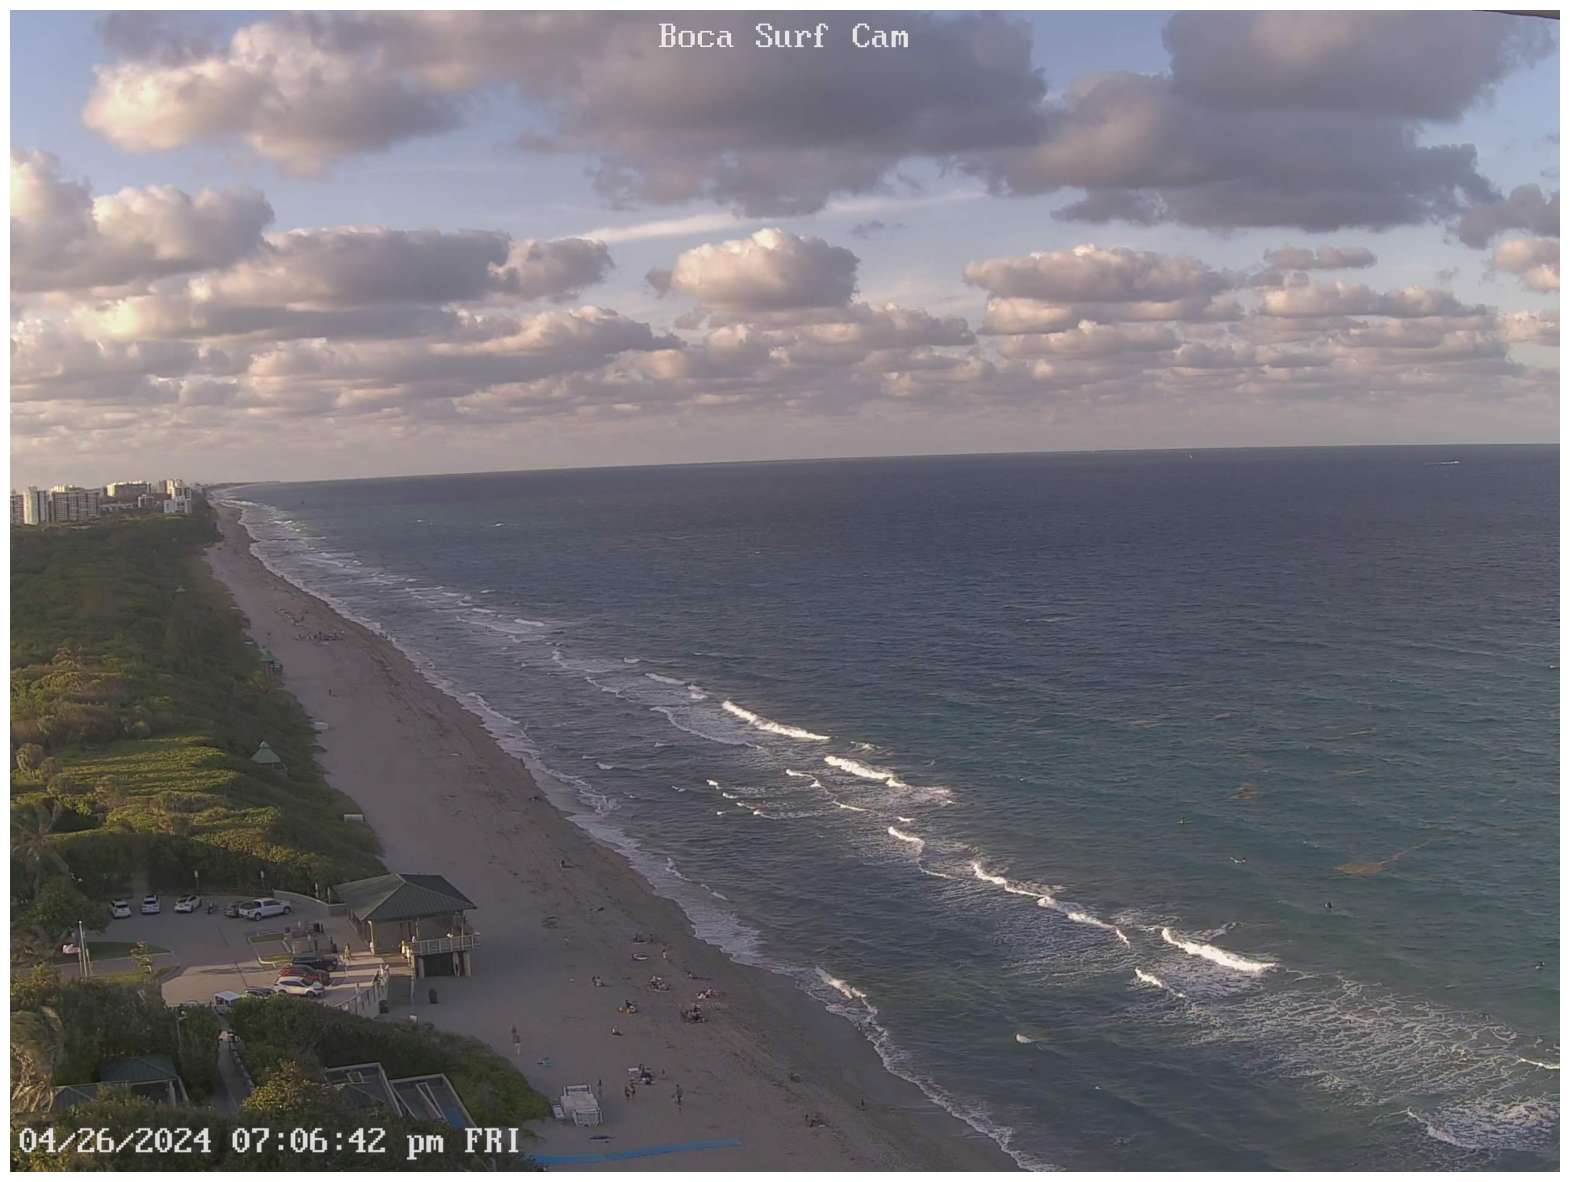

In [ ]:
plot(im)  # Use the plot function to display the image, helping to visualize the data before processing

In [ ]:
def load_im(im):
    image = Image.fromarray(im)  # Convert numpy array to PIL image object
    img_tensor = preprocess(image)  # Apply predefined preprocessing transformations
    img_tensor = img_tensor.unsqueeze_(0)  # Add a batch dimension to tensor
    img_variable = torch.tensor(img_tensor).cuda(0)  # Convert tensor to CUDA tensor (if CUDA is available) for use on GPU
    return img_variable  # Return the preprocessed and CUDA-ready image tensor


In [ ]:
out = net(load_im(im))  # Process the image through the neural network 'net' after applying necessary transformations via 'load_im'

<ipython-input-29-23c0ac92a0ed>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)  # Convert tensor to CUDA tensor (if CUDA is available) for use on GPU


In [ ]:
def inference(im):
    out = net(load_im(im))  # Run the image through the network to get the output
    label_index = out.cpu().data.numpy().argmax()  # Find the index of the highest prediction score
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])  # Get indices of the top 10 predictions
    print(labels[label_index])  # Print the most likely label
    print('____')  # Print a separator line
    for i in range(10):
        print(labels[top_list[i]])  # Print the top 10 labels


In [ ]:
inference(im)   # Run the 'inference' function on the image 'im' to make predictions and possibly visualize results or log metrics

seashore, coast, seacoast, sea-coast
____
seashore, coast, seacoast, sea-coast
sandbar, sand bar
promontory, headland, head, foreland
wing
fireboat
cliff, drop, drop-off
breakwater, groin, groyne, mole, bulwark, seawall, jetty
valley, vale
volcano
lakeside, lakeshore


<ipython-input-29-23c0ac92a0ed>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)  # Convert tensor to CUDA tensor (if CUDA is available) for use on GPU


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [1]:
%%capture
# Update apt-get and suppress the output
!apt-get update

# Install necessary libraries and suppress the output
!pip install wandb  # Install the wandb library for experiment tracking and visualization
!apt-get install poppler-utils  # Install utilities for rendering PDF files, required by pdf2image
!pip install pdf2image  # Install the library to convert PDF files into images
!pip install flashtorch  # Install the flashtorch library for visualizing neural network features

# Import necessary modules
import requests  # Library to make HTTP requests
import matplotlib.pyplot as plt  # Visualization library for plotting graphs and images
import numpy as np  # Fundamental package for scientific computing with Python
import torch  # Core PyTorch library for tensor operations and deep learning
from torchvision import *  # Importing all functions/classes from torchvision
from pdf2image import convert_from_path  # Function to convert PDF files to images
from flashtorch.utils import apply_transforms  # Import utility function to apply image transformations
import wandb as wb  # Import the wandb library as wb for tracking and managing experiments


In [2]:
def GPU(data):
    # Convert data to a PyTorch tensor that allows gradients, intended for model training or complex calculations
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    # Convert data to a PyTorch tensor without gradients, intended for data that won't require gradient updates
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [3]:
def plot(x):
    fig, ax = plt.subplots()  # Create a figure and a single subplot
    im = ax.imshow(x, cmap='gray')  # Display the image x in grayscale
    ax.axis('off')  # Disable axis labels and ticks
    fig.set_size_inches(5, 5)  # Set the size of the figure to 5x5 inches
    plt.show()  # Display the figure


In [4]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"  # Base URL for Google Slides
    url_body = url.split('/')[5]  # Extracts the unique ID from the provided URL
    page_id = url.split('.')[-1]  # Extracts the last part of the URL, often the page ID
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id  # Constructs the full URL to download the PDF version of a specific slide

def get_slides(url):
    url = get_google_slide(url)  # Get the modified URL to access the slide as a PDF
    r = requests.get(url, allow_redirects=True)  # Makes an HTTP GET request to download the PDF
    open('file.pdf', 'wb').write(r.content)  # Writes the PDF content to a file
    images = convert_from_path('file.pdf', 500)  # Converts the PDF file to images at 500 DPI
    return images  # Returns the list of images extracted from the PDF

def load(image):
    # Applies predefined transforms to the image and ensures it is ready for processing by a model on the specified device
    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Defines the device for processing; uses GPU if available, otherwise CPU


In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [6]:
import torch
from torchvision.models import alexnet

# Define the device to use GPU if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the AlexNet model with pre-trained weights and send it to the specified device
model = alexnet(pretrained=True).to(device)

# Set the model to evaluation mode
model.eval()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 138MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
url = "https://docs.google.com/presentation/d/18QLRghFERroaxEZVhcjLQ-C2Fosu-mlUBrvVNPdu_XA/edit#slide=id.g1f80d3df18f_0_58"

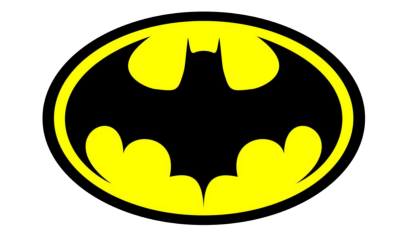

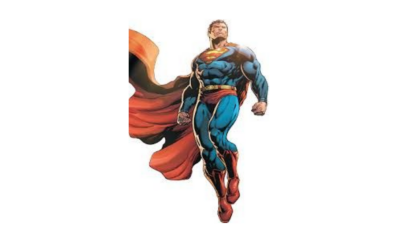

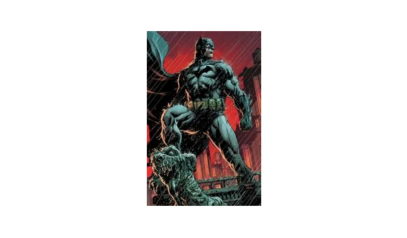

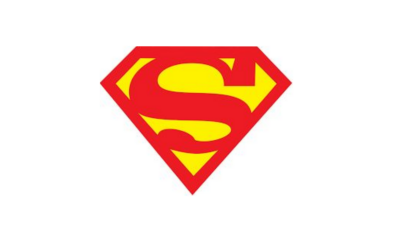

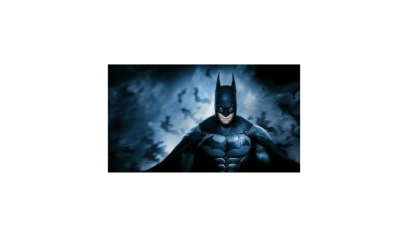

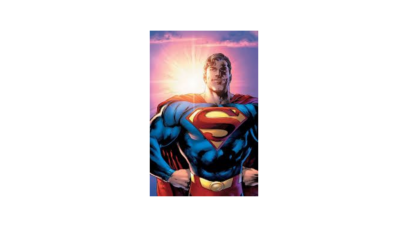

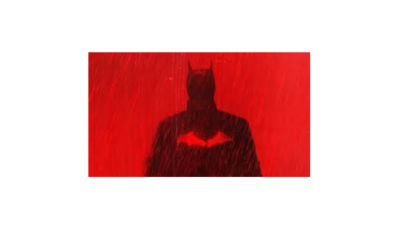

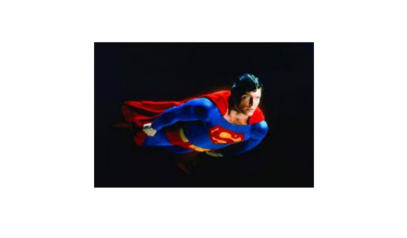

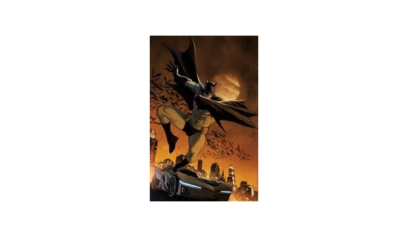

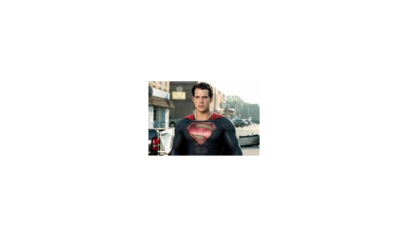

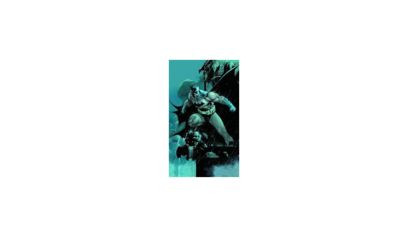

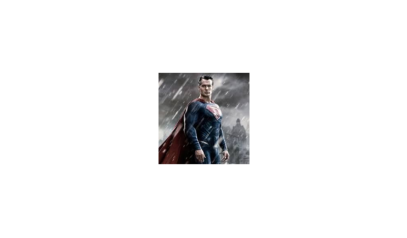

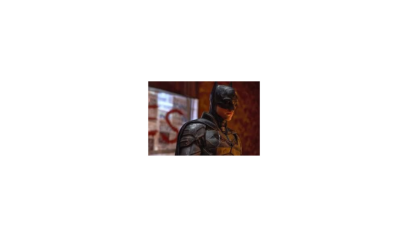

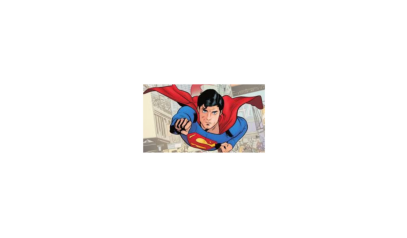

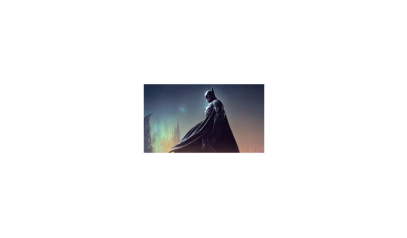

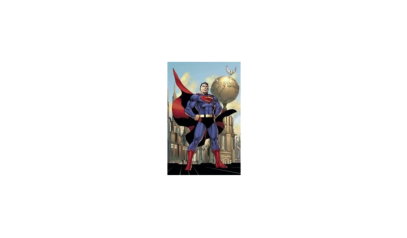

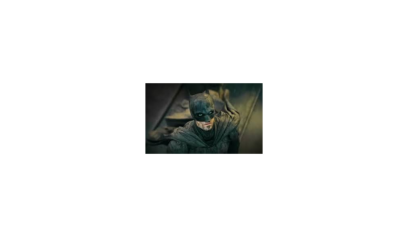

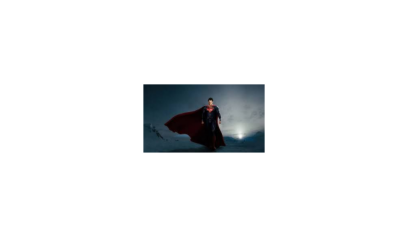

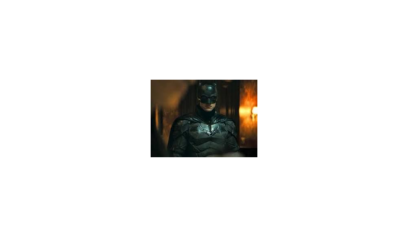

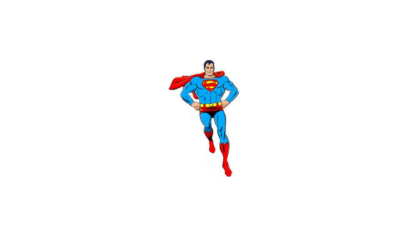

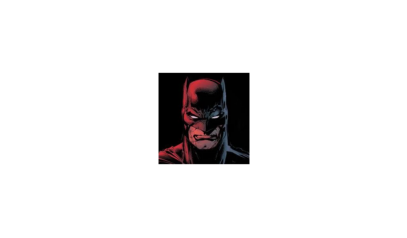

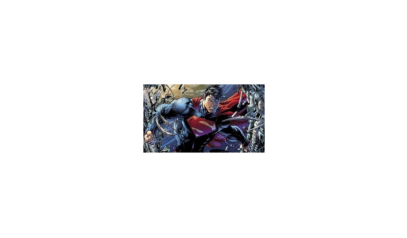

In [8]:
import torch  # Ensure torch is imported

# Initialize an empty list to store processed images
images = []

try:
    # Iterate over each image obtained from the Google Slides PDF
    for image in get_slides(url):
        plot(image)  # Display the image using the plot function
        processed_image = load(image)  # Process the image using the 'load' function
        if processed_image is not None:
            images.append(processed_image)
except Exception as e:
    print(f"An error occurred while processing images: {e}")

# Check if images list is not empty to avoid errors
if images:
    images = torch.vstack(images)  # Stack all processed images into a single tensor for further processing
else:
    print("No images were processed or list is empty.")


In [9]:
images.shape  # Get the shape/dimensions of the image tensor

torch.Size([22, 3, 224, 224])

In [10]:
model(images)  # Pass the images through the model without storing the output (useful for quick tests or checks)

tensor([[-8.4857, -6.4705, -2.7908,  ..., -3.3258,  0.5410,  2.9731],
        [ 1.9687, -0.9350, -2.4294,  ..., -2.8747,  0.0225, -0.3788],
        [-3.7792, -1.3961, -4.2663,  ..., -3.8682,  1.3785, -1.5173],
        ...,
        [-2.0944,  0.9475, -2.6465,  ..., -5.0668, -0.4288,  1.1803],
        [-3.3463, -3.0465, -3.8568,  ..., -2.9563, -1.0771,  0.6533],
        [-3.3212, -3.4521, -2.5628,  ..., -4.9099, -0.0731,  1.7910]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
y = model(images)  # Pass the images through the model and store the output in 'y'

In [12]:
y.shape  # Get the shape of the output tensor from the model

torch.Size([22, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy()  # Compute the index of the max logit score across columns to get the predicted class index, move to CPU, and convert to NumPy array

In [14]:
for i in list(guesses):  # Iterate over each prediction index
    print(labels[i])  # Print the corresponding label for each prediction index


pick, plectrum, plectron
parachute, chute
binder, ring-binder
pick, plectrum, plectron
television, television system
web site, website, internet site, site
studio couch, day bed
television, television system
mousetrap
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
chain saw, chainsaw
notebook, notebook computer
iPod
web site, website, internet site, site
web site, website, internet site, site
iPod
parachute, chute
iPod
binder, ring-binder


In [15]:
Y = np.zeros(50,)  # Create an array of zeros with length 50
Y[25:] = 1  # Set the second half of the array to 1 (useful for binary classification tasks)

In [16]:
Y  # Display the array Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
X = y.detach().cpu().numpy()  # Detach 'y' from the computation graph, move to CPU, and convert to NumPy array for further processing

In [18]:
X.shape  # Get the shape of the tensor 'X'

(22, 1000)

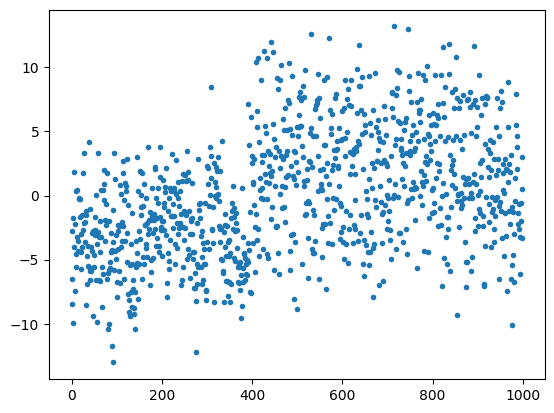

In [19]:
plt.plot(X[0],'.')  # Plot the first row of 'X' using dots as markers

In [20]:
X[0]  # Display the first row of the array 'X'

array([-8.48570061e+00, -6.47045851e+00, -2.79083419e+00, -9.91474819e+00,
       -1.78284609e+00,  1.86108494e+00, -4.01084948e+00, -7.45445156e+00,
       -2.21467018e+00, -4.53802109e+00, -5.55488491e+00,  3.40394229e-01,
       -3.20558214e+00,  4.59271908e-01, -3.55889344e+00, -4.32380533e+00,
       -2.73202896e-01, -1.77125081e-01, -2.93046623e-01, -1.70870245e+00,
       -4.38815069e+00, -5.71505499e+00, -3.02817249e+00, -3.97415876e+00,
       -1.51472950e+00,  1.71698534e+00, -2.72386050e+00, -2.14832735e+00,
        3.34521461e+00, -3.60540342e+00, -2.03554845e+00, -1.24307156e+00,
       -1.54390991e+00, -8.51366425e+00, -4.75014877e+00, -6.90214920e+00,
       -3.95589161e+00, -5.49950695e+00,  4.13470364e+00, -5.54822445e+00,
       -1.04467213e+00, -5.86503410e+00, -6.57127714e+00, -4.03888083e+00,
       -5.87588072e+00, -4.29403782e+00, -2.92430210e+00, -2.79736161e+00,
       -9.37116146e+00, -5.60137653e+00, -4.66374826e+00, -3.04961061e+00,
       -1.65652025e+00, -

In [21]:
np.argmax(X[0])  # Find the index of the maximum value in the first row of 'X'

714

In [22]:
labels[948]  # Access the label corresponding to index 948 in the labels dictionary

'Granny Smith'

In [23]:
top_ten = np.argsort(X[0])[::-1][0:10]  # Get the indices of the top 10 values in the first row of 'X'


In [24]:
for i in top_ten:  # Iterate over the indices of the top 10 values
    print(labels[i])  # Print the label corresponding to each index

pick, plectrum, plectron
puck, hockey puck
digital clock
gasmask, respirator, gas helmet
bib
sunglass
mailbag, postbag
wall clock
steel drum
barrel, cask


In [25]:
labels  # Display the entire labels dictionary

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  4.,  30., 112., 182., 207., 181., 134.,  91.,  45.,  14.]),
 array([-13.01111126, -10.39274883,  -7.77438688,  -5.15602493,
         -2.53766274,   0.08069944,   2.69906163,   5.31742382,
          7.93578577,  10.55414772,  13.17251015]),
 <BarContainer object of 10 artists>)

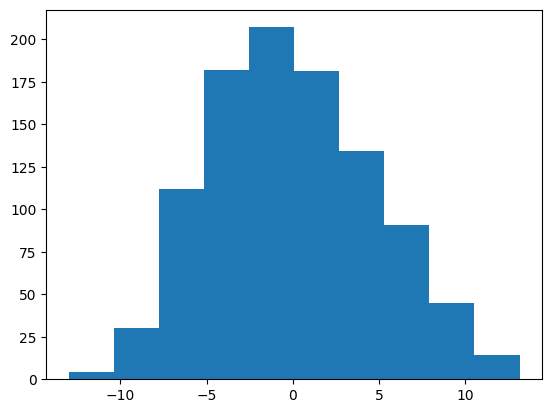

In [26]:
plt.hist(X[0])  # Create a histogram of the first row of 'X'

In [27]:
X = GPU_data(X)  # Convert the input feature data 'X' to a GPU tensor without requiring gradient computation
Y = GPU_data(Y)  # Convert the label data 'Y' to a GPU tensor without requiring gradient computation


In [28]:
def softmax(x): # convert logits to probabilities
    s1 = torch.exp(x - torch.max(x, 1)[0][:, None])  # Subtract the max value in each row for numerical stability and then compute the exponent
    s = s1 / s1.sum(1)[:, None]  # Normalize the exponentiated values by dividing by the sum of exponentiated values in each row
    return s  # Return the computed softmax values


In [29]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [30]:
def Truncated_Normal(size):
    u1 = torch.rand(size) * (1 - np.exp(-2)) + np.exp(-2)  # Sample from a uniform distribution, scaled and shifted for truncation
    u2 = torch.rand(size)  # Sample from a uniform distribution for the angle
    z = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * np.pi * u2)  # Apply the Box-Muller transform to generate normally distributed values

    return z  # Return the truncated normal distribution values


In [31]:
def acc(out, y):
    with torch.no_grad():  # Context manager that disables gradient calculation, which is useful during inference or evaluation to reduce memory usage and increase computation speed
        return (torch.sum(torch.max(out, 1)[1] == y).item()) / y.shape[0]  # Calculate the accuracy by comparing the predicted labels with the true labels and then averaging


In [32]:
X.shape

torch.Size([22, 1000])

In [33]:
def get_batch(mode):
    b = c.b  # Retrieve batch size from a configuration object 'c'
    if mode == "train":  # Check if the mode is set to training
        r = np.random.randint(X.shape[0] - b)  # Randomly select a start index 'r' for the batch in the training data
        x = X[r:r+b, :]  # Slice the input features 'X' from index 'r' to 'r+b'
        y = Y[r:r+b]  # Slice the corresponding labels 'Y' from index 'r' to 'r+b'
    elif mode == "test":  # Check if the mode is set to testing
        r = np.random.randint(X_test.shape[0] - b)  # Randomly select a start index 'r' for the batch in the testing data
        x = X_test[r:r+b, :]  # Slice the input features 'X_test' from index 'r' to 'r+b'
        y = Y_test[r:r+b]  # Slice the corresponding labels 'Y_test' from index 'r' to 'r+b'
    return x, y  # Return the batch of features and labels


In [34]:
def model(x,w):

    return x@w[0]

In [35]:
def make_plots():
    acc_train = acc(model(x, w), y)  # Calculate the training accuracy using the current batch 'x', 'y' and model weights 'w'

    wb.log({"acc_train": acc_train})  # Log the training accuracy to Weights & Biases (wandb) for tracking and visualization


In [ ]:
wb.init(project="Linear_Model_Photo_1")  # Initialize a Weights & Biases (wandb) project for tracking and visualization
c = wb.config  # Configuration object to set and store hyperparameters

c.h = 0.001  # Learning rate
c.b = 4  # Batch size
c.epochs = 100000  # Number of epochs

w = [GPU(Truncated_Normal((1000,2)))]  # Initialize weights using a truncated normal distribution, moved to GPU

optimizer = torch.optim.Adam(w, lr=c.h)  # Set up the Adam optimizer with the learning rate and weights

for i in range(c.epochs):  # Loop over the number of epochs
    x, y = get_batch('train')  # Get a batch of data for training

    loss = cross_entropy(softmax(model(x, w)), y)  # Compute the cross-entropy loss from the softmax probabilities

    optimizer.zero_grad()  # Reset gradients to zero for a new optimization step
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the weights

    wb.log({"loss": loss})  # Log the loss value to wandb for tracking

    make_plots()  # Generate plots, presumably to visualize training progress or results


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: